# SIADS 502: Math Methods for Data Science 


# School of Information, University of Michigan


## Week2: Eigenvalue/Eigenvector/Linear Trasformation

### Version 1.2

This assignment is designed to demonstrate basic linear algebra and computational properties of matrices through identifying linearity across vectors, using row reduction to calculate eigenvalues and eigenvectors. Please read the directions carefully, as we want to avoid submissions that are marked incorrect due to formatting mistakes. You will be using sympy, numpy, and scipy for this assignment. 

Ensure that the following code is present at the beginning of your assignment:
- from sympy import *
- import numpy as np
- from numpy import linalg


Please enter your name: "Allison Yih"

## Part 1: Linear (In)dependence


<b>1.0</b> In this section, we will be determining if a set of vectors are linearly independent (if they are not, then they are linearly dependent). Below you will be asked to write a function to decide if 2, 3, or 4 inputed vectors in $\mathbf{R}^3$ are linearly independent.  


    


In [2]:
from sympy import *
import numpy as np
from scipy import linalg
from numpy import linalg
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Senate = pd.read_csv('assets/senate.txt')
RB = pd.read_csv('assets/red_blue.txt', ' ')

In [3]:
#uncomment the below line to view snippet of txt file
#Senate.head()
#RB.head()

<strong>1.1</strong> \[2 pt\] Impliment the function Indy2Vec that takes in two 3 dimentional vectors each represented as an array and tells whether they are linearly independent.


In [4]:
def Indy2Vec(v1, v2):
    _, i = Matrix(np.array([v1,v2])).T.rref()
    if len(i) == 2:
        return True
    else:
        return False
# YOUR CODE HERE
#raise NotImplementedError()


In [5]:
v1 = np.array([0, 5, 0])
v2 = np.array([0, -10, 0])
v3 = np.array([1, 2, 3])
v4 = np.array([-2, -4, -6])
assert Indy2Vec(v1, v2) == False, "Problem 1.1, Your code said that two linearly dependent vectors were independent"
assert Indy2Vec(v3, v4) == False, "Problem 1.1, Your code said that two linearly dependent vectors were independent"
assert Indy2Vec(v1, v3) == True, "Problem 1.1, Your code said that two linearly independent vectors were dependent"
assert Indy2Vec(v2, v3) == True, "Problem 1.1, Your code said that two linearly independent vectors were dependent"

<strong>1.2</strong> \[2 pt\] Impliment the function Indy2Vec that takes in three 3 dimentional vectors each represented as an array and tells whether they are linearly independent.

In [6]:
def Indy3Vec(v1, v2, v3):
    if Matrix(np.array([v1,v2,v3])).det() != 0:
        return True
    else:
        return False
# YOUR CODE HERE
#raise NotImplementedError()


In [7]:
v1=np.array([-1,3,4])
v2=np.array([6,-2,9])
v3=np.array([3,8,5]) 

assert Indy3Vec(v1, v2, v3) == True, "Problem 1.2, Your code said that two linearly independent vectors were dependent"

<strong>1.3</strong> \[1 pt\] Impliment the function Indy4Vec that takes in four 3 dimentional vectors each represented as an array and tells whether they are linearly independent.

In [8]:
def Indy4Vec(v1, v2, v3, v4):
        return False #max amount of linearly ind vectors for 3d is 3
    
# YOUR CODE HERE
#raise NotImplementedError()

In [9]:
v1=np.array([-1,3,4])
v2=np.array([6,-2,9])
v3=np.array([3,8,5])
v4=np.array([5,6,7])


assert Indy4Vec(v1, v2, v3, v4) == False, "Problem 1.3, Your code said that two linearly dependent vectors were independent"

<strong>1.4</strong> \[2 pt\] Impliment the function ThreeVec that takes in three 3 dimentional vectors each represented as an array,stacks the arrays vertically (each array is a row in a matrix), and returns a list in which the first element is the rank of the matrix, the second element is the rank of its transpose, the third element is its determinant rounded to two decimal places, the fourth element is the first element of its inverse rounded to two decimal places if its inverse exists and is the string "no inverse" if it does not exist.





In [10]:
def get_inv(matrix):
    try:
        if np.allclose(np.dot(matrix, np.linalg.inv(matrix)), np.eye(3)) ==  True:
            return round(np.linalg.inv(matrix)[0][0],2) 
        else:
            return "no inverse"
    except np.linalg.LinAlgError:
        return "no inverse"
    
def ThreeVec(v1, v2, v3):
    matrix = np.array([v1,v2,v3])
    res = [np.linalg.matrix_rank(matrix), np.linalg.matrix_rank(matrix.T), round(np.linalg.det(matrix), 2), get_inv(matrix)]
    #YOUR CODE HERE
    return res
    
# YOUR CODE HERE
#raise NotImplementedError()


In [12]:
v1=np.array([10,4.4,13])
v2=np.array([-5,-3.1,4])
v3=np.array([15,5.7,30])



assert(ThreeVec(v1, v2, v3) == [2, 2, 0.0, 'no inverse']), "Problem 1.4, Your function does not compute the example correctly."











<strong>1.5</strong> [3 pt] Given a matrix $A$ (as an np.array), return a vector $v$ as an np.array with shape $(3, )$ in a way that depends on the injective, surjective, and bijective properties of $A$.  

If $A$ it is bijective, return a vector $v$ such that $Av=\left(\begin{array}{c} 1 \\ 2 \\ 1 \end{array} \right)$. 

If $A$ is not bijective because it is not injective, return a vector $v$ (that does not equal $\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array} \right)$) such that $Av= A\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array} \right)$. 

If $A$ is not bijective because it is not  surjective, return a vector $v$ where the first two coordinate of $v$ are 1 and $v= Ax$ for some vector $x$.  (E.g. $v = \left(\begin{array}{c} 1 \\ 1 \\ z \end{array} \right)$ for the correct value of $z$.)

Note that for this problem $A$ will always either be surjective or injective.  




(a) A= np.array([[1,2,3],[2,1,1]])

In [55]:
#A= np.array([[1,2,3],[2,1,1]])  #not bijective + injective
#np.dot(A, np.array([1,1,1])) [A] x [1,1,1] = [6,4]
v= np.array([4/3,-2/3,2])
#np.dot(A,v)
#YOUR CODE HERE

# YOUR CODE HERE
#raise NotImplementedError()

In [56]:
#hidden tests for problem 1.5(a) are within this cell

(b) A= np.array([[1,2],[3,4],[10,6]])

In [85]:
#A = np.array([[1,2],[3,4],[10,6]])   #not bijective + surjective
v= np.array([1,1,-4])
#YOUR CODE HERE

# YOUR CODE HERE
#raise NotImplementedError()

In [86]:
#hidden tests for problem 1.5(b) are within this cell

(c) A= np.array([[1,2,3],[3,4,5],[4,10,6]])

In [87]:
A = np.array([[1,2,3],[3,4,5],[4,10,6]])  #bijective
b = np.array([1,2,1])
v = np.linalg.solve(A,b)
v

#x = np.array([0,-1,1])
#np.dot(A,x)

# YOUR CODE HERE
#raise NotImplementedError()

array([ 0.4, -0.3,  0.4])

In [88]:
#hidden tests for problem 1.5(c) are within this cell

## Part 2: Eigenvalue/ Eigenvector


<strong>2.1</strong> \[1 pt\] What is the eigenvalue and eigenvectors of the matrix[[1,3],[2,5]]? Please store the eigenvalues in the variable called <strong>vals</strong>. The datatype for vals should be a numpy array.



In [89]:
v1= np.array([[1,3],[2,5]])
vals= np.linalg.eigvals(v1)
# YOUR CODE HERE
#raise NotImplementedError()

In [90]:
#hidden tests for problem 2.1 are within this cell

<strong>2.2</strong> \[1 pt\] What are the eigenvectors of the matrix [[1,3],[2,5]]? Please store the eigenvectors in a variable called <strong>vecs</strong>. The datatype for vals should be an array.



In [91]:
_,vecs= np.linalg.eig(v1)
# YOUR CODE HERE
#raise NotImplementedError()

In [92]:
#hidden tests for problem 2.2 are within this cell

<strong>2.3</strong> \[2 pt\] Find a 2 x 2 matrix with integer entries that has 10 and 25 as eigenvalues with eigen vectors $(1, 4)$ and $(1, -1)$ respectively.  Record it as an array in $ANS23$ with integer entries.  Hint: Put variables for entries in a 2 x 2 array, write out the equations that must be satisfied, and solve.

In [95]:
ANS23 = np.array([[22,-3],[-12,13]])
    

# YOUR CODE HERE
#raise NotImplementedError()


In [96]:
assert type(ANS23) == np.ndarray, "Problem 2.3, Your answer should be an array"
assert ANS23.shape == (2, 2), "Problem 2.3, Your array should be dimension 2 x 2"

assert np.isclose(ANS23 @ np.array([1, 4]), np.array([10, 40])).all(), "Problem 2.3, Your array should have [1, 4] as an eigenvector with eigenvalue 10"





2.4 [2 pt] Use the txt files loaded at the start of this assignment to find the principal components of the Senate dataset and to make a scatterplot with PC1 on the x-axis and PC2 on the y-axis (i.e. a senator's location on the scatterplot is his/her (PC1 loading, PC2 loading)), and where each senator's dot is the color of his political party. 

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Use "iloc" to remove the first three columns from the Senate dataset
Senate = pd.read_csv('assets/senate.txt')
Senate = Senate.iloc[:,3:]
res = PCA(n_components = 5)
#Use the sklearn "PCA" package loaded at the start of this assignment to find the first 5 eigenvectors and eigenvalues
pca_senators= res.fit_transform(Senate)
eig_vals = res.explained_variance_
eig_vecs = res.components_
#eig_vecs = np.linalg.eig(np.cov(pca_senators.T))[1]
# YOUR CODE HERE
#raise NotImplementedError()

In [123]:
#hidden tests for problem 2.4 are within this cell

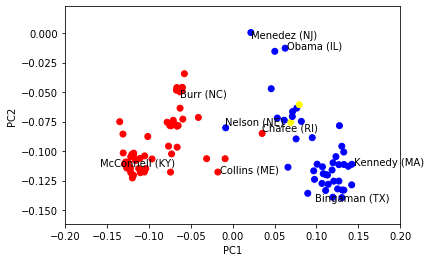

In [124]:
#run this cell to make a scatter plot using your results
plt.scatter(res.components_[0], res.components_[1], c=RB['Color'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.annotate("Nelson (NE)", (-0.009, -0.078))
plt.annotate("Chafee (RI)", (0.035, -0.083))
plt.annotate("McConnell (KY)", (-0.159, -0.112))
plt.annotate("Kennedy (MA)", (0.145, -0.112))
plt.annotate("Menedez (NJ)", (0.022, -0.004))
plt.annotate("Collins (ME)", (-0.015, -0.118))
plt.annotate("Obama (IL)", (0.065, -0.013))
plt.annotate("Burr (NC)", (-0.063, -0.054))
plt.annotate("Bingaman (TX)", (0.098, -0.142))
plt.xlim(-0.2, 0.2)
plt.show()

## Part 3: Composition 


<strong>3.1</strong> \[1 pt\] Assume f(x)= 3x+6 and g(y)= 2y+1, what is the reduced equation of h(x)=g * f(x)=g(f(x))? Store your answer in the variable <strong>compo</strong> as a string type that is a valid python formula.  For example, "5 * x ** 2 + 4".  Note that neither "5 x ** 2 + 4" nor ""5 * x ^ 2 + 4" are valid python formulas.

In [125]:
compo="6*x + 13"
# YOUR CODE HERE
#raise NotImplementedError()

In [126]:
assert type(compo) == str, "Problem 3.1, testing compo, type of value stored in variable does not match the expected type. Expecting String."

<strong>3.2</strong> \[1 pt\] Given x = 1, use the equation assigned to compo to solve. Store your answer in the variable <strong>compo1</strong> as an integer. 

In [127]:
compo1=(6*1)+13
# YOUR CODE HERE
#raise NotImplementedError()

In [128]:
import numbers
assert isinstance(compo1, numbers.Number), "Problem 3.2, testing compo1, type of value stored in variable does not match the expected type. Expecting Integer."

## Part4: Linear Transformation 

<strong>4.1</strong> \[2 pt\] Assume we have an function: $f(x, y, z) = x$<sup>2</sup>$yz/3+x\sqrt{y}$+3z =10, is this function linear in x, y, or z?  For each variable, provide a string with a nonlinear term involving that variable or the empty string if none exists.  Again, report python executable strings.  For example, the equation might be written "(x ** 2) * y * z/3 + x * np.sqrt(y) + z + 3z = 10" in python

In [129]:
non_linear_X = "((x**2)*y*z)/3"
non_linear_Y = "x + np.sqrt(y)"
non_linear_Z = ""
# YOUR CODE HERE
#raise NotImplementedError()

In [130]:
#hidden tests for problem 4.1 are within this cell